In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import gym
import numpy as np
from gym.envs.registration import register
from gym import wrappers
import shutil

In [2]:
# register(
#     id='FrozenLakeNotSlippery-v0',
#     entry_point='gym.envs.toy_text:FrozenLakeEnv',
#     kwargs={'map_name' : '4x4', 'is_slippery': False},
#     max_episode_steps=100,
#     reward_threshold=0.78, # optimum = .8196
# )

#env = gym.make('FrozenLakeNotSlippery-v0')


In [3]:
env = gym.make('FrozenLake-v0')
shutil.rmtree('/tmp/FrozenLake_01') 
env = wrappers.Monitor(env, '/tmp/FrozenLake_01')

[2017-09-23 11:44:19,654] Making new env: FrozenLake-v0
[2017-09-23 11:44:19,992] Creating monitor directory /tmp/FrozenLake_01


[2017-09-23 11:44:20,092] Starting new video recorder writing to C:\tmp\FrozenLake_01\openaigym.video.0.11972.video000000.json
[2017-09-23 11:44:20,138] Starting new video recorder writing to C:\tmp\FrozenLake_01\openaigym.video.0.11972.video000001.json
[2017-09-23 11:44:20,154] Starting new video recorder writing to C:\tmp\FrozenLake_01\openaigym.video.0.11972.video000008.json
[2017-09-23 11:44:20,180] Starting new video recorder writing to C:\tmp\FrozenLake_01\openaigym.video.0.11972.video000027.json
[2017-09-23 11:44:20,207] Starting new video recorder writing to C:\tmp\FrozenLake_01\openaigym.video.0.11972.video000064.json
[2017-09-23 11:44:20,262] Starting new video recorder writing to C:\tmp\FrozenLake_01\openaigym.video.0.11972.video000125.json
[2017-09-23 11:44:20,319] Starting new video recorder writing to C:\tmp\FrozenLake_01\openaigym.video.0.11972.video000216.json
[2017-09-23 11:44:20,434] Starting new video recorder writing to C:\tmp\FrozenLake_01\openaigym.video.0.11972.v

Score over time: 0.7


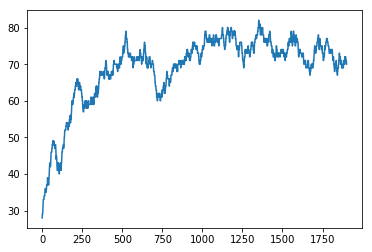

In [4]:
#Initialize table with all zeros
#Q = np.zeros([env.observation_space.n,env.action_space.n])
Q= np.zeros((env.observation_space.n, env.action_space.n))
# Set learning p-arameters
y = 0.95
num_episodes = 2000
exp=np.zeros((num_episodes,3))
rList = []
alpha=np.log(0.000001)/num_episodes
for i in range(num_episodes):
    lr= np.exp(alpha*i)
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    done=False
    #The Q-Table learning algorithm
    while done==False:
        #Choose an action by greedily (with noise) picking from Q table
        if np.random.rand() < lr*0.1:
            a = np.random.randint(env.action_space.n)
        else:
            a = np.argmax(Q[s,:] )
        #Get new state and reward from environment
        s1,reward,done,_ = env.step(a)
        if done:
            r = 1.0 if reward > 0.0 else -1.0
        else:
            r = -0.01
        #exp[i,:]=
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] +  lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rAll += reward
        s = s1
        if done == True:
            break
    #jList.append(j)
    rList.append(rAll)
print "Score over time: " +  str(sum(rList[-100:])/100.0)
plt.plot(np.convolve(np.ones(100),rList,"valid"))

In [5]:
print "Final Q-Table Values"
print Q

Final Q-Table Values
[[-0.0612323  -0.16672225 -0.16147791 -0.17348907]
 [-0.40602965 -0.72395101 -0.53345186 -0.23774454]
 [-0.50622785 -0.35035067 -0.71084465 -0.56779257]
 [-0.68078511 -0.47303975 -0.98290344 -0.36735489]
 [-0.03295921 -0.22829065 -0.41230718 -0.7295173 ]
 [ 0.          0.          0.          0.        ]
 [-0.45243359 -0.99399385 -0.81453872 -0.94504978]
 [ 0.          0.          0.          0.        ]
 [-0.40622839 -0.30872104 -0.29732835  0.02640655]
 [-0.38106994  0.12734861 -0.36277713 -0.47602276]
 [ 0.08421519 -0.73093086 -0.90701847 -0.92906849]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [-0.41429481 -0.05380686  0.33282711 -0.33395888]
 [ 0.20569128  0.63330078  0.30905533  0.27626907]
 [ 0.          0.          0.          0.        ]]


In [6]:
s = env.reset()
d=False
n=0
while d==False:
    n+=1
    a = np.argmax(Q[s,:])
    s,r,d,x = env.step(a)
    #print("%s %s %s %s"%(s,r,d,x))
env.render()
print n

[2017-09-23 11:44:22,157] Starting new video recorder writing to C:\tmp\FrozenLake_01\openaigym.video.0.11972.video002000.json


  (Down)
SFFF
FHFH
FFFH
HFFG
35


In [7]:
env.close()
gym.upload('/tmp/FrozenLake_01', api_key='sk_o9OoYpSkKamkW8MrKuHw')

[2017-09-23 11:44:22,342] Finished writing results. You can upload them to the scoreboard via gym.upload('C:\\tmp\\FrozenLake_01')
[2017-09-23 11:44:22,361] [FrozenLake-v0] Uploading 2001 episodes of training data
[2017-09-23 11:44:26,211] [FrozenLake-v0] Uploading videos of 12 training episodes (1518 bytes)
[2017-09-23 11:44:26,887] [FrozenLake-v0] Creating evaluation object from /tmp/FrozenLake_01 with learning curve and training video
[2017-09-23 11:44:27,252] 
****************************************************
You successfully uploaded your evaluation on FrozenLake-v0 to
OpenAI Gym! You can find it at:

    https://gym.openai.com/evaluations/eval_wQ8rHMavTga9cqN4F9Row

****************************************************
